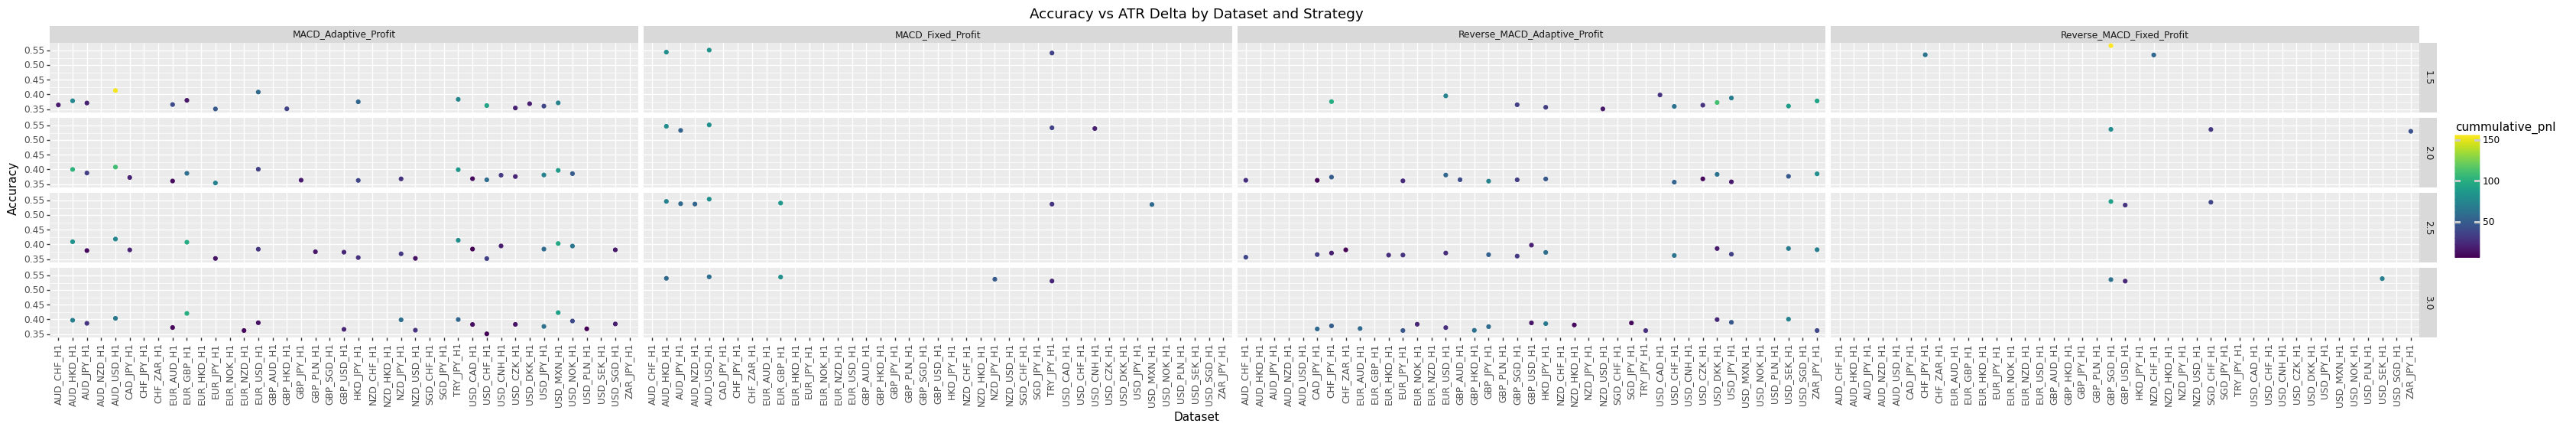

In [1]:
from plotnine import *
import pandas as pd

df = pd.read_csv(
    "/projects/genomic-ml/da2343/ml_project_2/cnn/results/2024-01-24_06:09_results.csv"
)
df = df[(df["cummulative_pnl"] > 10) & (df["atr_delta"] >= 1.5)]
df = df[
    ((df["strategy"] == "MACD_Adaptive_Profit") & (df["accuracy"] >= 0.35))
    | ((df["strategy"] == "Reverse_MACD_Adaptive_Profit") & (df["accuracy"] >= 0.35))
    | ((df["strategy"] == "MACD_Fixed_Profit") & (df["accuracy"] >= 0.53))
    | ((df["strategy"] == "Reverse_MACD_Fixed_Profit") & (df["accuracy"] >= 0.53))
]

# take first 10 rows
# df = df.head(10)

p = ggplot(df)
p = p + geom_point(aes(x="dataset_name", y="accuracy", color="cummulative_pnl"))
p = p + facet_grid("atr_delta~strategy")
p = p + labs(
    x="Dataset", y="Accuracy", title="Accuracy vs ATR Delta by Dataset and Strategy"
)
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(40, 5))
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


In [2]:
df

,dataset_name,strategy,atr_delta,accuracy,cummulative_pnl,num_trades
1,HKD_JPY_H1,MACD_Adaptive_Profit,1.5,0.374860,56.504533,891
2,GBP_USD_H1,Reverse_MACD_Adaptive_Profit,1.5,0.373333,-2.521078,525
7,EUR_AUD_H1,MACD_Adaptive_Profit,2.0,0.360406,14.245949,788
15,USD_MXN_H1,MACD_Adaptive_Profit,1.5,0.371197,72.780174,986
17,EUR_HUF_H1,MACD_Adaptive_Profit,2.5,0.376037,-27.824396,1085
...,...,...,...,...,...,...
1303,USD_NOK_H1,MACD_Adaptive_Profit,1.0,0.356974,40.639245,1269
1305,EUR_USD_H1,MACD_Adaptive_Profit,1.5,0.408197,58.589853,610
1311,CHF_ZAR_H1,Reverse_MACD_Adaptive_Profit,2.5,0.381339,10.076835,986
1317,USD_DKK_H1,MACD_Adaptive_Profit,2.0,0.368471,-9.866181,1053
